In [1]:
# loading libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
# loading dataset
dataset_location = "C:\\Users\\Lakshan Bandara\\Desktop\\bank-full.csv"
dataset = read_csv(dataset_location, sep= ';')

In [3]:
# printing number of columns and rows in the dataset before pre processing
print(dataset.shape)

(45211, 17)


In [4]:
# printing first 10 records before pre processing
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# printing summary of the datset to get the column data types and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# finding numerical data
numerical_data_columns = [column_name for column_name in dataset.columns if dataset[column_name].dtype =='int64']
print("There are {} numerical data columns and those are : " .format(len(numerical_data_columns)), numerical_data_columns)

There are 7 numerical data columns and those are :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
# finding if there are missing values in numerical data columns
dataset[numerical_data_columns].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [8]:
# finding categorical data
categorical_data_columns = [column_name for column_name in dataset.columns if dataset[column_name].dtype=='O']
print("There are {} categorical data columns and those are : " .format(len(categorical_data_columns)), categorical_data_columns)

There are 10 categorical data columns and those are :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [9]:
# finding if there are missing values in categorical data columns
dataset[categorical_data_columns].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [10]:
# printing number of instances belonging to each outcome
print(dataset.groupby('y').size())

y
no     39922
yes     5289
dtype: int64


In [11]:
# printin statistical discription of the dataset before pre processing
print(dataset.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Text(0, 0.5, 'number of people')

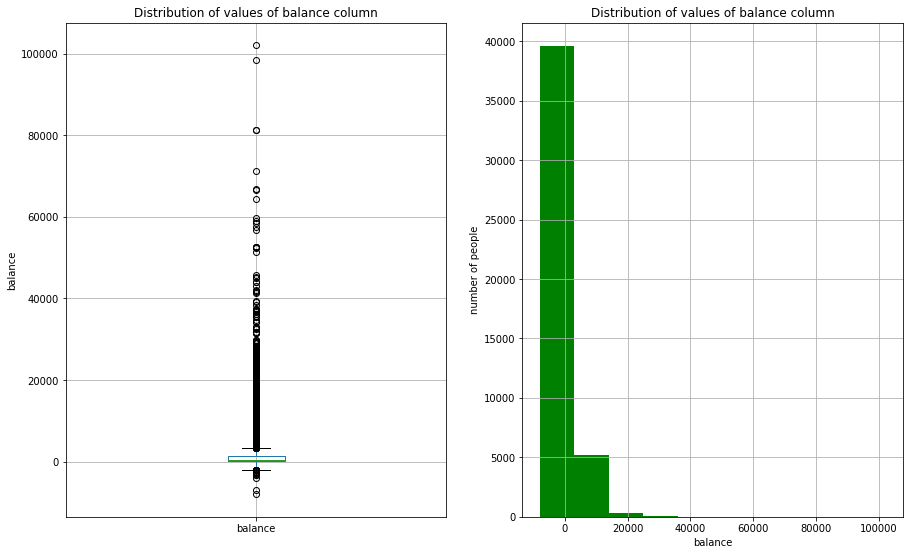

In [12]:
# printing boxplots and histogram to represent outliers possible in balance column due to high std
pyplot.figure(figsize=(15,20))

pyplot.subplot(2,2, 1)
figure = dataset.boxplot(column='balance')
figure.set_title('Distribution of values of balance column')
figure.set_ylabel('balance')


pyplot.subplot(2, 2, 2)
figure = dataset.balance.hist(color='green')
figure.set_title('Distribution of values of balance column')
figure.set_xlabel('balance')
figure.set_ylabel('number of people')

In [13]:
# finding outliers of balance column
IQR = dataset.balance.quantile(0.75) - dataset.balance.quantile(0.25)
print('Interquartile range = {}'.format(IQR))
lower_boundary = dataset.balance.quantile(0.25) - (IQR * 3)
upper_boundary = dataset.balance.quantile(0.75) + (IQR * 3)
print('Balance column outliers are values smaller than {lower_boundary} or larger than {upper_boundary}'.format(lower_boundary=lower_boundary, upper_boundary=upper_boundary))

Interquartile range = 1356.0
Balance column outliers are values smaller than -3996.0 or larger than 5496.0


In [14]:
# dropping raws wchich contains outliers in balance column
dataset.drop(dataset[dataset['balance'] > 5496.0].index, axis=0, inplace=True)
dataset.drop(dataset[dataset['balance'] < -3996.0].index, axis=0, inplace=True)

Text(0, 0.5, 'number of people')

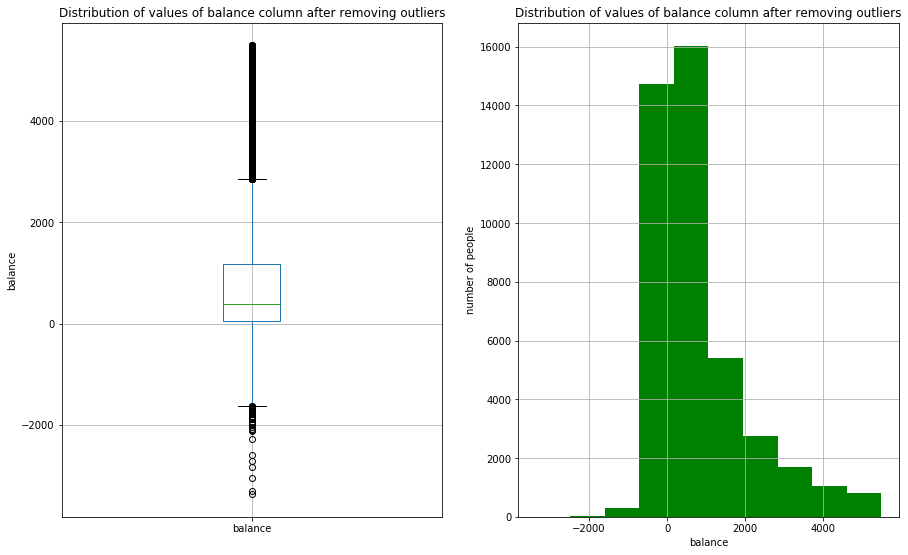

In [15]:
# printing boxplots and histogram to after removing outliers in balance column
pyplot.figure(figsize=(15,20))

pyplot.subplot(2,2, 1)
figure = dataset.boxplot(column='balance')
figure.set_title('Distribution of values of balance column after removing outliers')
figure.set_ylabel('balance')


pyplot.subplot(2, 2, 2)
figure = dataset.balance.hist(color='green')
figure.set_title('Distribution of values of balance column after removing outliers')
figure.set_xlabel('balance')
figure.set_ylabel('number of people')

In [16]:
# printing column names before pre processing
column_names = dataset.columns
print(column_names)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [17]:
# dropping poutcome column which does not contain userful data
dataset.drop('poutcome', axis=1, inplace=True)

# dropping contact column which does not contain userful data
dataset.drop('contact', axis=1, inplace=True)

# removing rows with unknown education and job data
dataset.drop(dataset[dataset['education'] == 'unknown'].index, axis=0, inplace=True)
dataset.drop(dataset[dataset['job'] == 'unknown'].index, axis=0, inplace=True)

In [18]:
# converting duration in second to minutes to get the feature to a similar scale of orther features
dataset['duration'] = dataset['duration']/60

# divide balance by 100 to get the feature to a similar scale of orther features
dataset['balance'] = dataset['balance']/10

In [19]:
# assignnin numerical labels to the categorical values
cleanup_data = {"month": {"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11},
                "job": {"admin.": 1, "unemployed": 0,"management": 2,"housemaid": 3,"entrepreneur": 4,"student": 5,
                            "blue-collar": 6,"self-employed": 7,"retired": 8,"technician": 9,"services": 10},
                "marital": {"married": 0,"divorced": 1,"single": 2},
                "education": {"secondary": 0,"primary": 1,"tertiary": 2},
                "default": {"yes": 1, "no": 0},
                "housing": {"yes": 1, "no": 0},
                "loan": {"yes": 1, "no": 0},
                "y": {"yes": 1, "no": 0}}

dataset.replace(cleanup_data, inplace=True)

In [20]:
# printing number of columns and rows in the dataset after pre processing
print(dataset.shape)

(40885, 15)


In [21]:
# printing first 10 records after pre processing
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,2,0,2,0,214.3,1,0,5,4,4.350000,1,-1,0,0
1,44,9,2,0,0,2.9,1,0,5,4,2.516667,1,-1,0,0
2,33,4,0,0,0,0.2,1,1,5,4,1.266667,1,-1,0,0
5,35,2,0,2,0,23.1,1,0,5,4,2.316667,1,-1,0,0
6,28,2,2,2,0,44.7,1,1,5,4,3.616667,1,-1,0,0
7,42,4,1,2,1,0.2,1,0,5,4,6.333333,1,-1,0,0
8,58,8,0,1,0,12.1,1,0,5,4,0.833333,1,-1,0,0
9,43,9,2,0,0,59.3,1,0,5,4,0.916667,1,-1,0,0
10,41,1,1,0,0,27.0,1,0,5,4,3.700000,1,-1,0,0
11,29,1,2,0,0,39.0,1,0,5,4,2.283333,1,-1,0,0


In [22]:
# assigning dataset values into an array
dataset_arrray = dataset.values
print(dataset_arrray[:,0:-1])


[[ 58.   2.   0. ...   1.  -1.   0.]
 [ 44.   9.   2. ...   1.  -1.   0.]
 [ 33.   4.   0. ...   1.  -1.   0.]
 ...
 [ 71.   8.   1. ...   2.  -1.   0.]
 [ 57.   6.   0. ...   4.  -1.   0.]
 [ 37.   4.   0. ...   2. 188.  11.]]


In [23]:
# slecting all the features except the output column
X = dataset_arrray[:,0:-1]
print(X)

[[ 58.   2.   0. ...   1.  -1.   0.]
 [ 44.   9.   2. ...   1.  -1.   0.]
 [ 33.   4.   0. ...   1.  -1.   0.]
 ...
 [ 71.   8.   1. ...   2.  -1.   0.]
 [ 57.   6.   0. ...   4.  -1.   0.]
 [ 37.   4.   0. ...   2. 188.  11.]]


In [24]:
# target variable
y = dataset_arrray[:,-1]
print(y)

[0. 0. 0. ... 1. 0. 0.]


In [25]:
# splitting dataset into X(training set) and y(testing set)
# 20% of the data will be used for testing
test_size= 0.20
random_num = 27
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size, random_state=random_num)

In [26]:
# instantiating the model setting inverse of regularization parmeter to medium or deafault value
logisticRegressionModelMediumRegularized = LogisticRegression(solver='liblinear', random_state=27, max_iter=1000, C=1)

# fitting the models
logisticRegressionModelMediumRegularized.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=27, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_prediction_test = logisticRegressionModelMediumRegularized.predict(X_test)
print('Model accuracy score: {0:0.6f}'. format(accuracy_score(y_test, y_prediction_test)))

Model accuracy score: 0.892870


Confustion Matrix
[[7123  113]
 [ 763  178]]

True Positives=  7123
True Negatives=  178
False Positives=  113
False Negatives=  763


(0, 2)

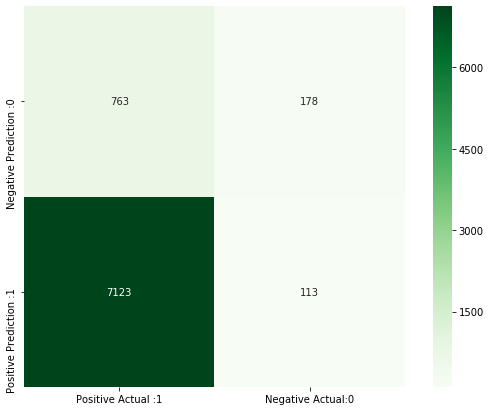

In [28]:
# generating the confusion matrix
cm = confusion_matrix(y_test, y_prediction_test)

print("Confustion Matrix")
print(cm)

print("\nTrue Positives= ", cm[0,0])
print("True Negatives= ", cm[1,1])
print("False Positives= ", cm[0,1])
print("False Negatives= ", cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Actual :1', 'Negative Actual:0'], 
                                 index=['Positive Prediction :1', 'Negative Prediction :0'])

figure, ax = pyplot.subplots(figsize=(10, 7))
sns.heatmap(cm_matrix, square=True, annot=True, fmt='d', cmap="Greens", )
ax.set_ylim([0,2])

In [29]:
#generating classification Report
print(classification_report(y_test, y_prediction_test))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7236
         1.0       0.61      0.19      0.29       941

    accuracy                           0.89      8177
   macro avg       0.76      0.59      0.62      8177
weighted avg       0.87      0.89      0.87      8177

